In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from sklearn.preprocessing import MinMaxScaler
import torch

import matplotlib.pyplot as plt

from SIPR import SIPR


data_path = 'SIPR/index_data/'
res_path = 'SIPR/res/'


In [ ]:
def train_recognition_module(
    data, dataname=None,
    n_clusters=12,
    l_min=12, l_max=16,
    max_iters=100,
    init_strategy='kmeans++',
    barycenter='dba', gamma=0.5,
    plot_progress=True,
    plot_loss=True,
    store_res=True
    ):
  
  # Run SIPR
  sipr = SIPR(n_clusters, l_min, l_max, gamma)
  sipr.fit(series=data, 
           max_iters=max_iters,
           init_strategy=init_strategy, 
           barycenter=barycenter,
           plot_progress=plot_progress,
           store_res=store_res, dataname=dataname)
  centroids = sipr.centroids
  labels = sipr.labels
  subsequences = sipr.subsequences
  segmentation = sipr.segmentation

  # Save results
  if store_res:
    df_centroids = pd.DataFrame(centroids)
    df_labels = pd.DataFrame(labels)
    df_subsequences = pd.DataFrame(subsequences)
    df_segmentation = pd.DataFrame(segmentation)
    dict_init = {'kmeans++': 'kmpp',
                 'random_sample': 'rs',
                 'random_noise': 'rn',
                 'reference':'ref'}
    filename = f"sipr_{dataname}_k{n_clusters}_l{l_min}-{l_max}_{barycenter[:4]}_{dict_init[init_strategy]}"
    df_centroids.to_csv(res_path + filename + '_centroids.csv')
    df_labels.to_csv(res_path + filename + '_labels.csv')
    df_subsequences.to_csv(res_path + filename + '_subsequences.csv')
    df_segmentation.to_csv(res_path + filename + '_segmentation.csv')
  
  # Plot training loss
  if plot_loss:
    hist_loss = np.array(sipr.hist_loss)
    plt.figure(figsize=(4,2))
    plt.plot(hist_loss, label='total_loss')
    plt.legend(loc='upper right')

  return centroids, labels, subsequences, segmentation



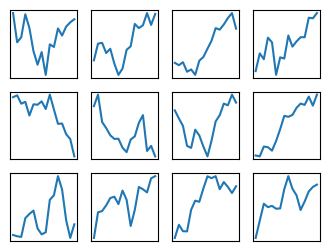

  0%|          | 0/100 [00:00<?, ?it/s]

-- Iter 1 --
Total Loss: 103.5075079233003


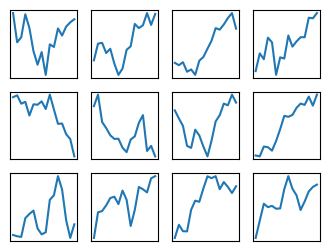

-- Iter 10 --
Total Loss: 95.20269044481743


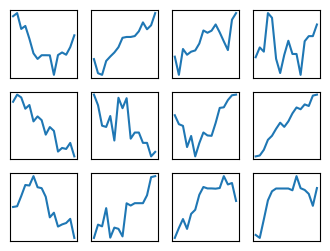

-- Iter 20 --
Total Loss: 93.72838853124907


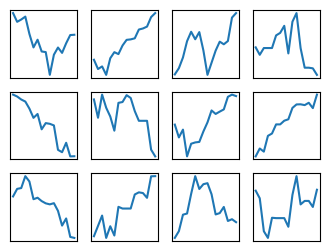

-- Iter 30 --
Total Loss: 94.24411315001763


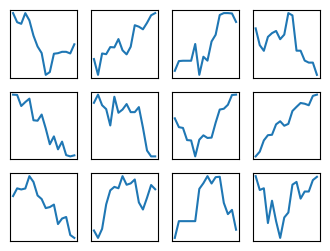

-- Iter 40 --
Total Loss: 90.62845580098825


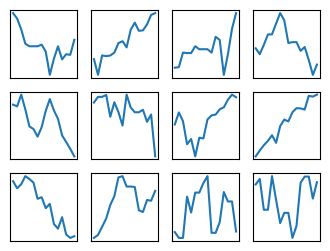

-- Iter 50 --
Total Loss: 91.24261231086503


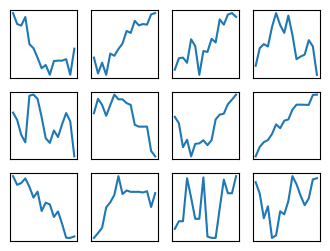

-- Iter 60 --
Total Loss: 91.62380171880145


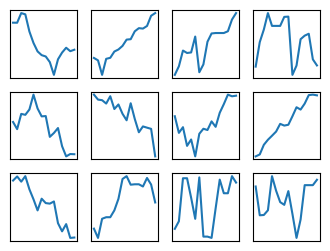

-- Iter 70 --
Total Loss: 92.85394107966655


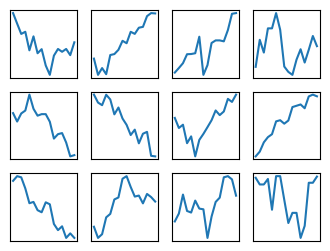

-- Iter 80 --
Total Loss: 93.06487424086814


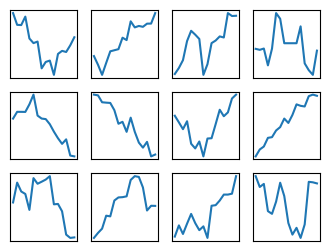

-- Iter 90 --
Total Loss: 91.84265923868996


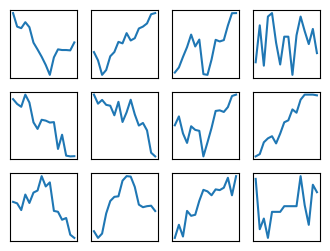

-- Iter 100 --
Total Loss: 94.33176147658372


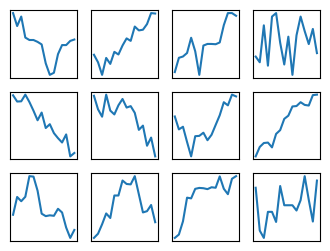

(array([[0.9359868956614606, 0.7949527884540636, 0.7904030369665961,
         0.9240004580313672, 0.6038344937991156, 0.46589432708844103,
         0.46589432708844103, 0.49274706975443183, 0.4760366956360471,
         0.13646454768204314, 0.0340491758968508, 0.37100734071899544,
         0.4458826250582193, 0.44549503708342403, 0.4257364739757041,
         0.5814797719515372],
        [0.3280029315476028, 0.19365054226787093, 0.029752882492473025,
         0.30651411553895724, 0.23398274890291965, 0.36253260306326496,
         0.3708602782701191, 0.44530049097492547, 0.5306124006297563,
         0.5917830579832732, 0.7476311956593923, 0.7705142049322727,
         0.7052056500459104, 0.7922766132684139, 0.9446289003876212,
         0.9727982113923765],
        [0.24754626681793943, 0.3558863936671186, 0.4081746641225896,
         0.39464141956509446, 0.689533046786587, 0.5539771042717836,
         0.17330030973912303, 0.04281343580370809, 0.2872137041118771,
         0.4451000843738871

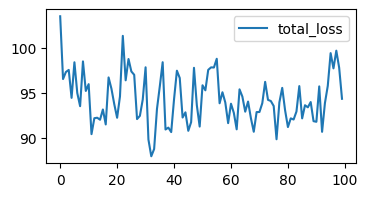

In [ ]:
nd_df = pd.read_csv('SIPR/index_data/nd100_index.csv',index_col=False)
df = nd_df['close'].values
train_recognition_module(df,dataname ='nd100')
